### CIA Country Analysis dan Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('CIA_Country_Facts.csv')

### Exploratory Data Analysis

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


<Axes: xlabel='Population', ylabel='Count'>

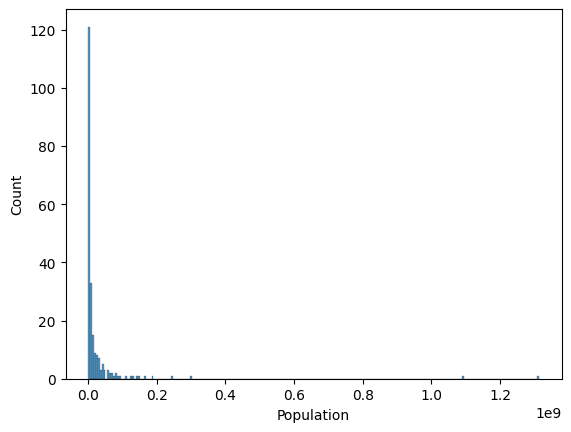

In [7]:
sns.histplot(data=df,x='Population')

Perhatikan distribusi histogram yang tidak seimbang karena beberapa negara besar, setel ulang sumbu X untuk hanya menampilkan negara dengan penduduk kurang dari 0,5 miliar

<Axes: xlabel='Population', ylabel='Count'>

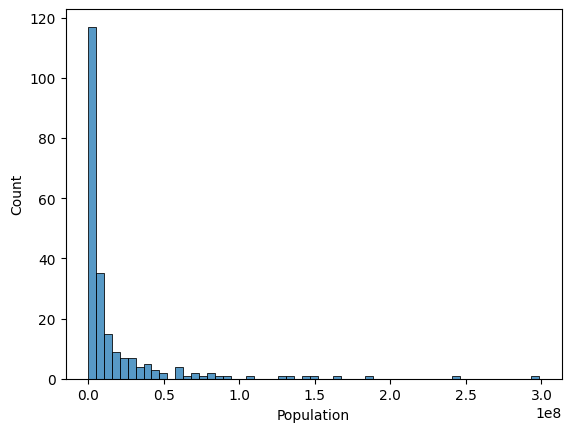

In [8]:
sns.histplot(data=df[df['Population']<500000000],x='Population')

Mengecek GDP tiap region

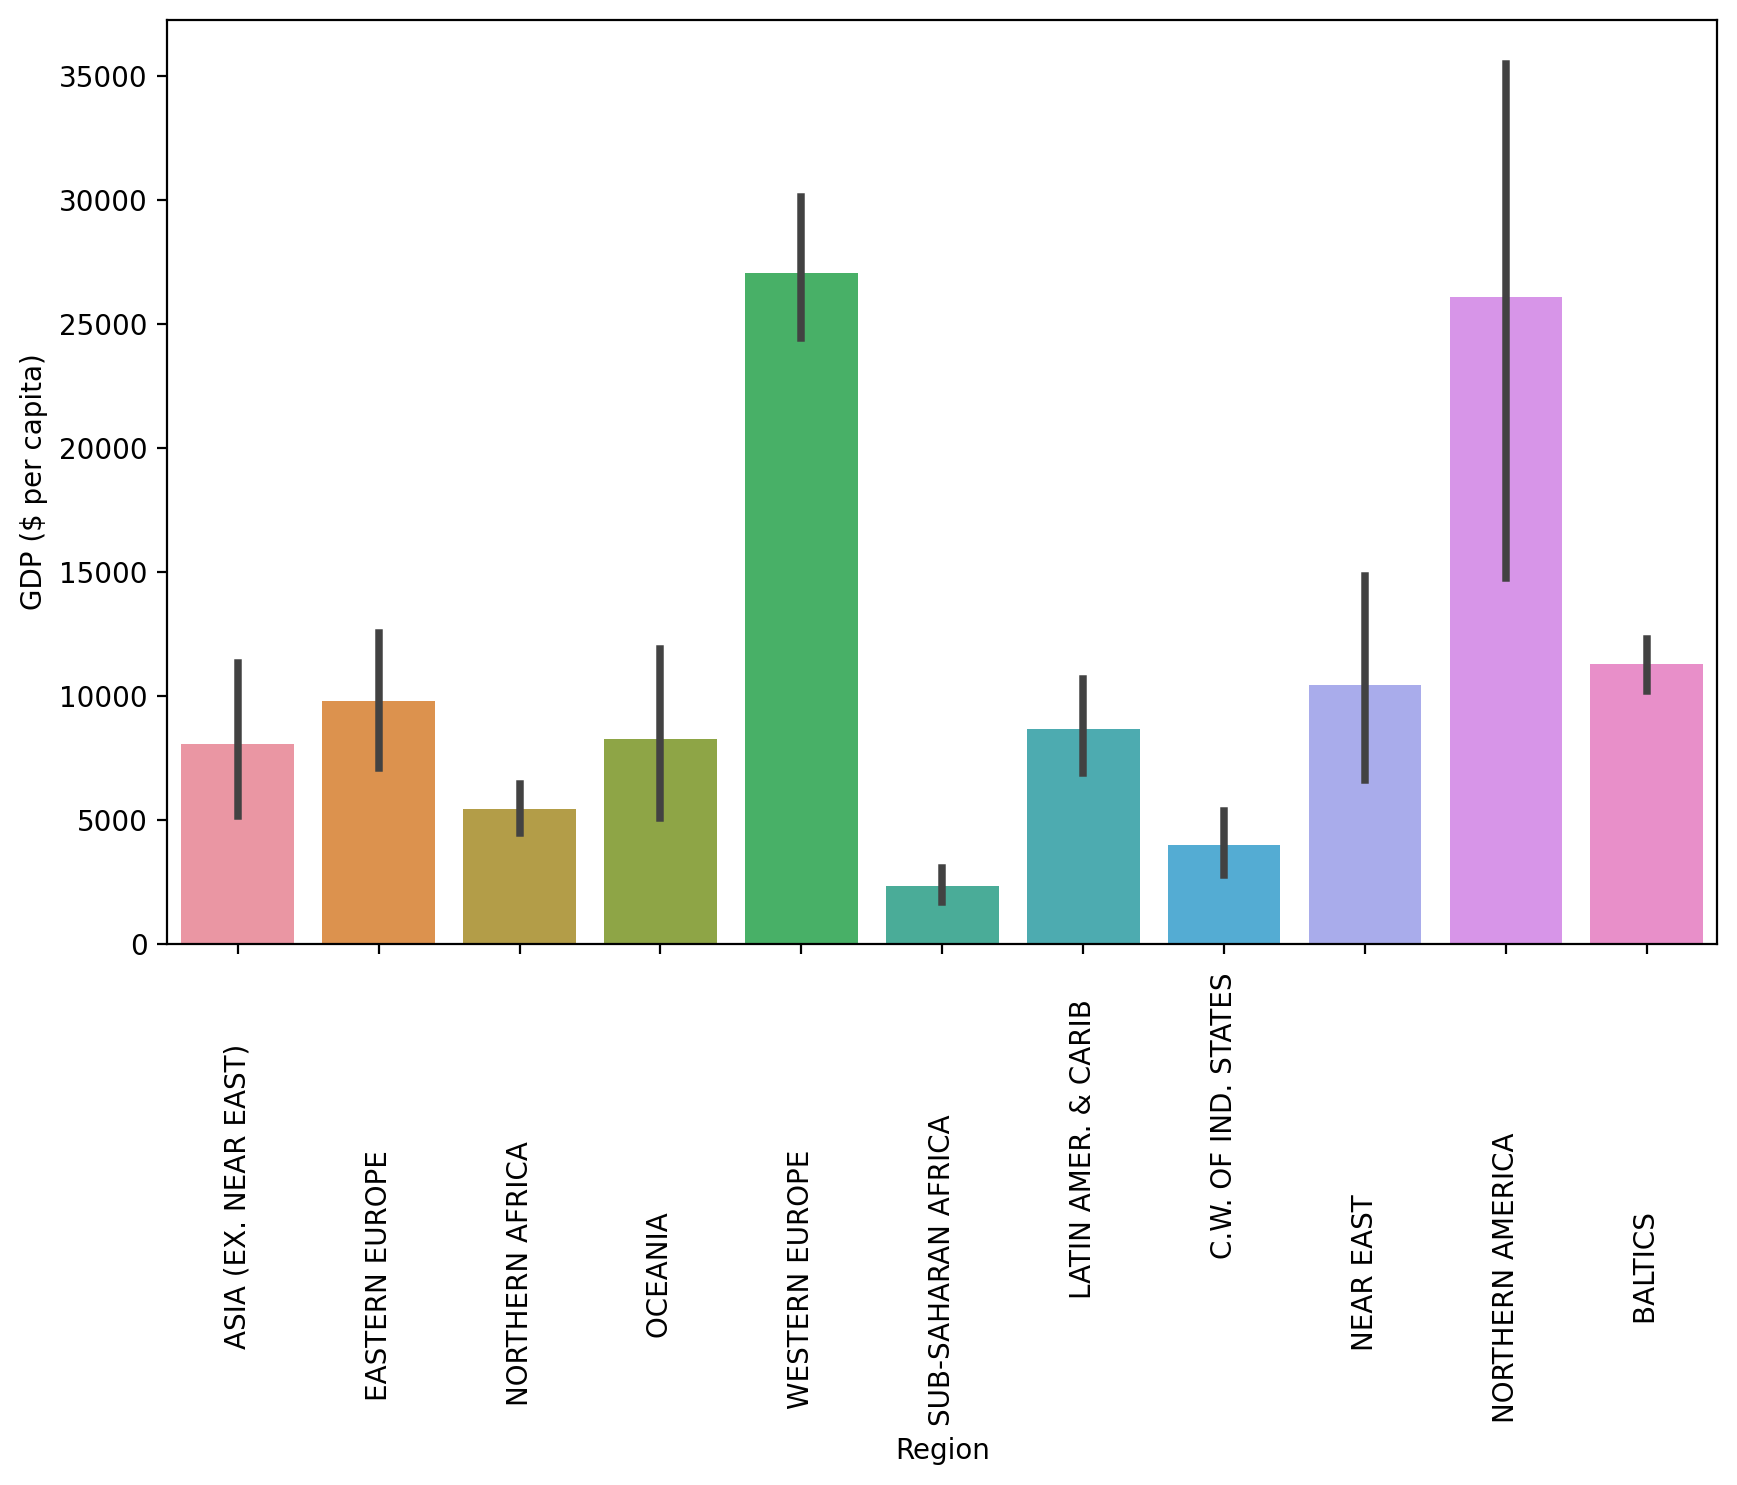

In [9]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

Hubungan antara Telepon per 1000 orang dan GDP per Kapita

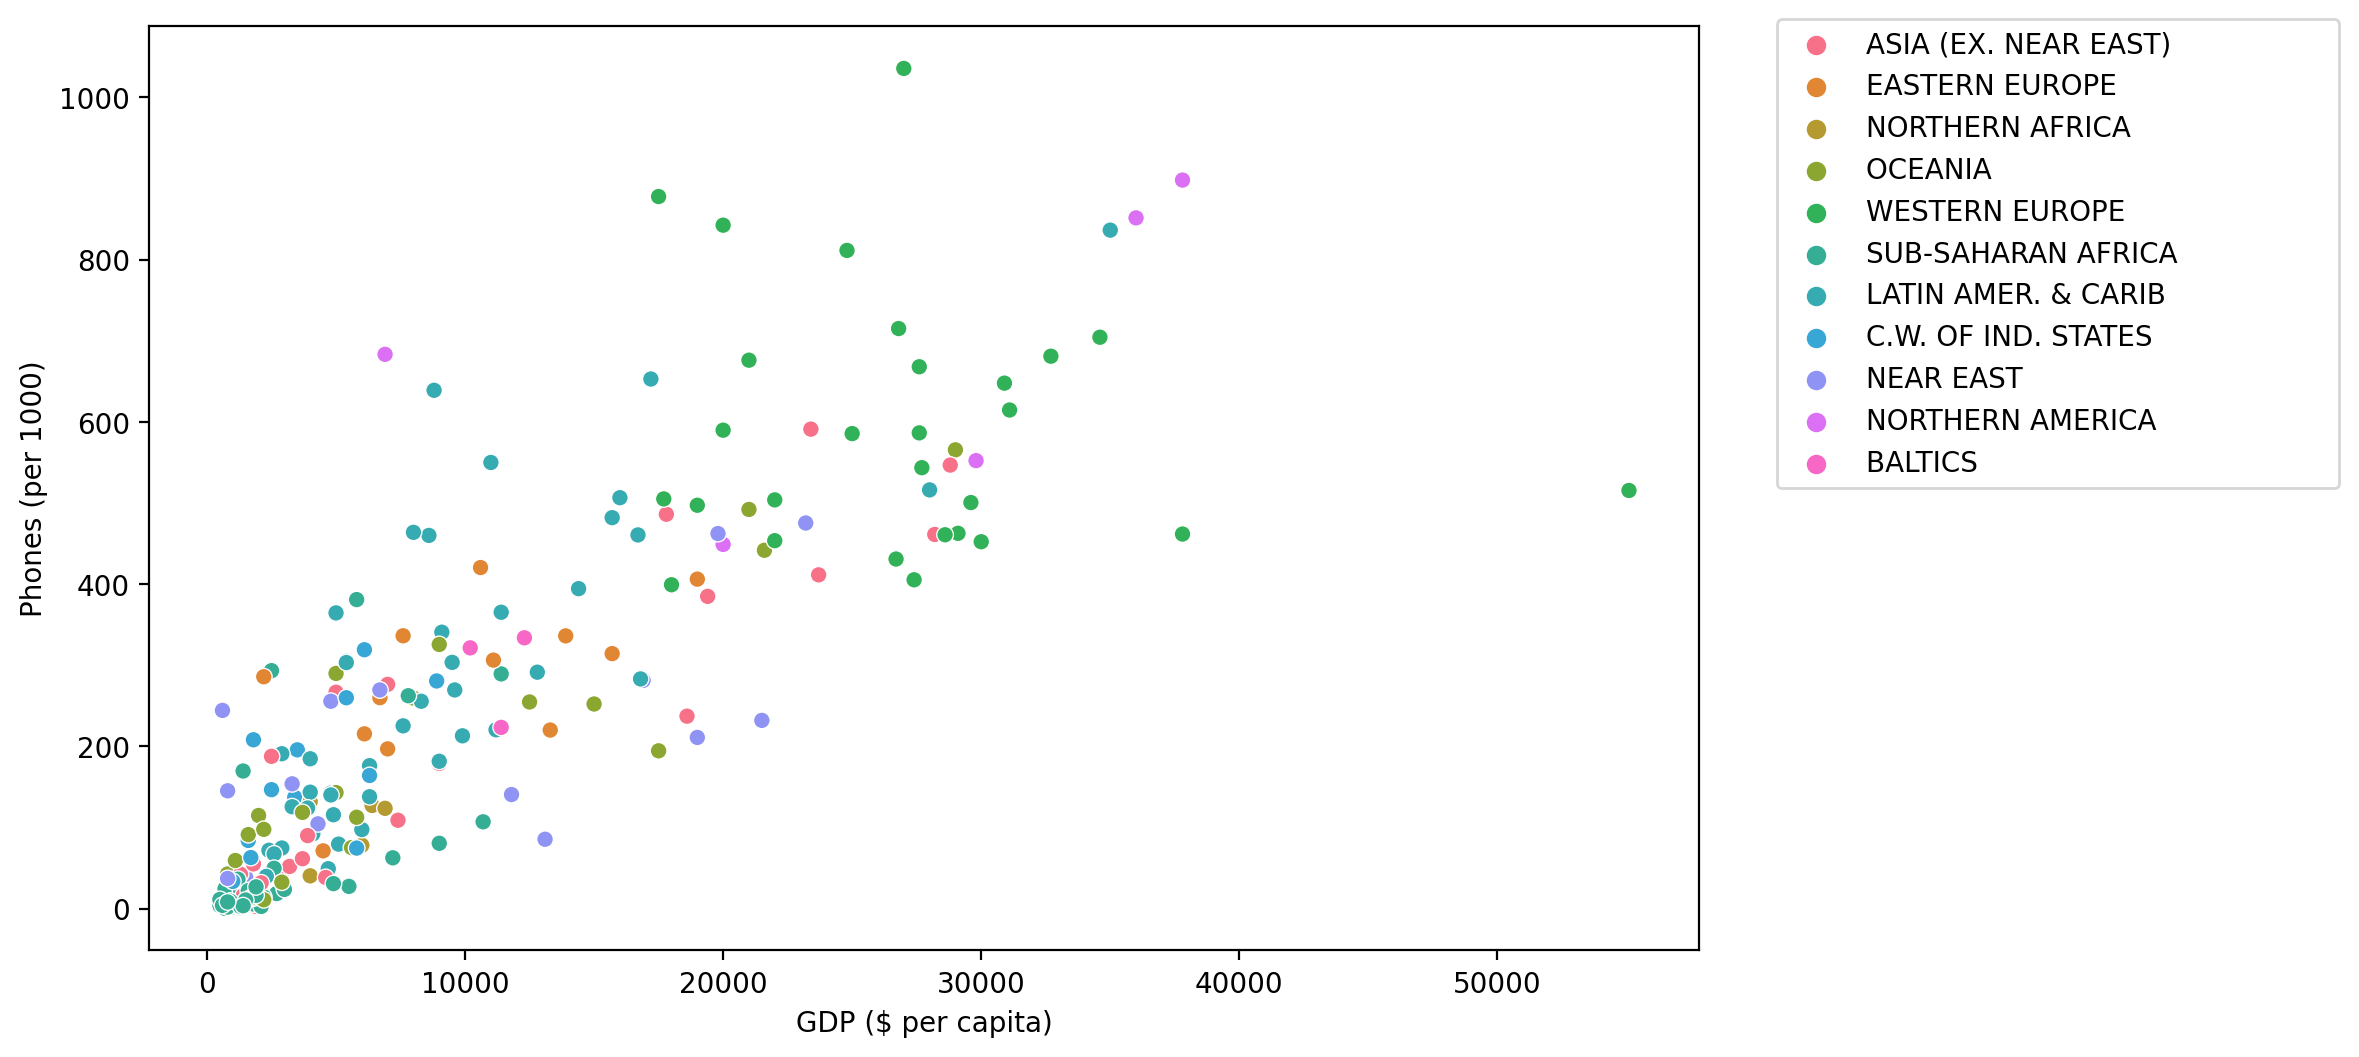

In [10]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Phones (per 1000)',hue='Region')
plt.legend(loc=(1.05,0.5))

Hubungan antara GDP per Kapita dan Literasi

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

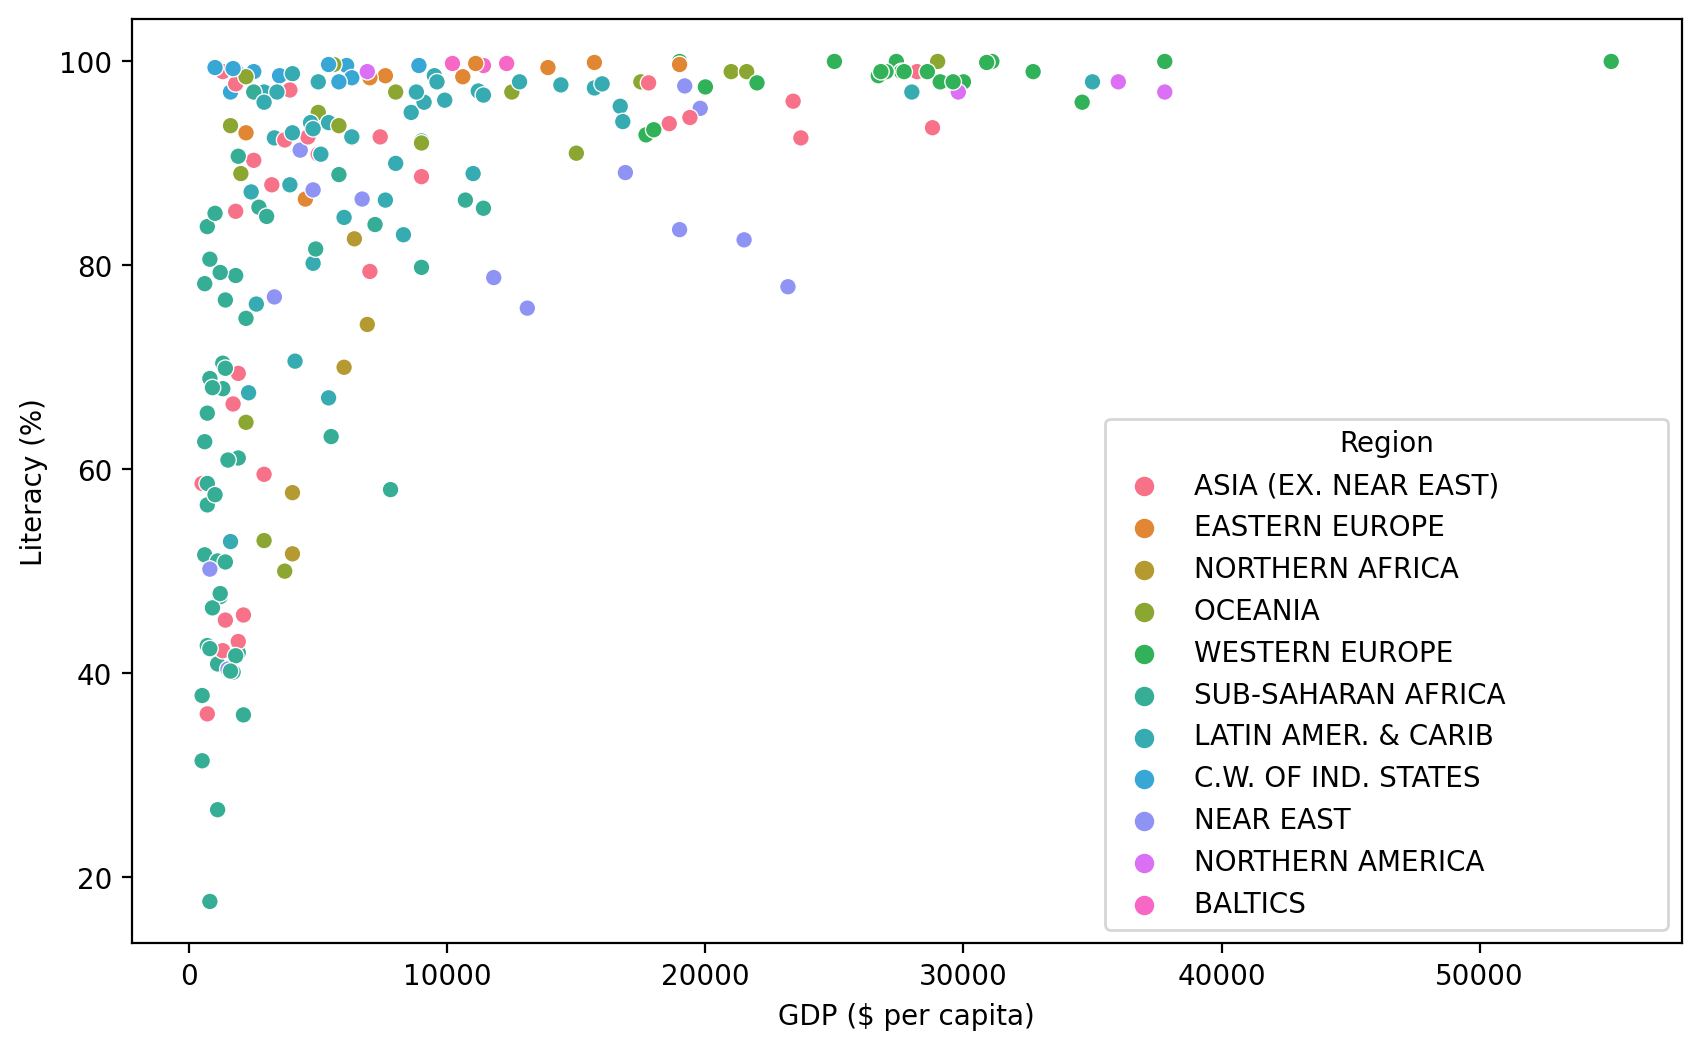

In [11]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

Melihat korelasi antara fitur

<Axes: >

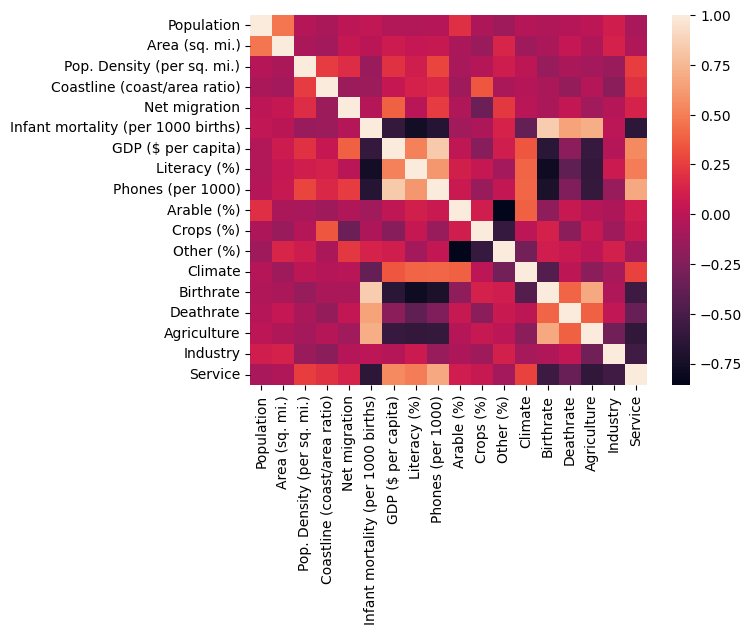

In [12]:
sns.heatmap(df.corr())

## Data Preparation

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Negara apa saja yang memiliki NaN untuk Pertanian? Apa aspek utama dari negara-negara ini?**

In [14]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Anda seharusnya memperhatikan sebagian besar negara-negara ini adalah pulau-pulau kecil, kecuali Greenland dan Sahara Barat. Lanjutkan dan isi salah satu negara yang tidak memiliki nilai NaN ini dengan 0, karena nilainya sangat kecil atau pada dasarnya tidak ada. Harus ada total 15 negara tempat Anda melakukan ini.**

    df[df['feature'].isnull()]
    

In [15]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [16]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Perhatikan iklim terdapat NaN untuk beberapa negara, tetapi region tidak terdapat NaN! Mari kita gunakan ini untuk keuntungan kita. Isikan nilai Iklim yang hilang berdasarkan nilai rata-rata iklim untuk region. Lakukan juga hal ini terhadap literacy**

Cara mengisi missing value dengan mean berdasarkan suatu grup: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [17]:
# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [18]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

### Mendrop null data

In [19]:
df = df.dropna()

Kolom negara masih merupakan string pengidentifikasi unik, sehingga tidak akan berguna untuk pengelompokan, karena unik untuk setiap titik. Lanjutkan dan jatuhkan kolom Negara ini.

In [20]:
X = df.drop("Country",axis=1)

In [21]:
X = pd.get_dummies(X)

In [22]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling

**Karena terdapat beberapa pengukuran dalam persentase dan metrik lainnya seperti jumlah total populasi, maka kita harus menskalakan data ini terlebih dahulu.**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [25]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Kmeans Model




**Gunakan loop untuk membuat dan menyesuaikan beberapa model KMeans, menguji dari K=2-30 klaster. Catat Jumlah Jarak Kuadrat untuk setiap nilai K, lalu plot ini untuk membuat plot "siku" K versus SSD.**

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []

for k in range(2,30):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    wcss.append(model.inertia_)

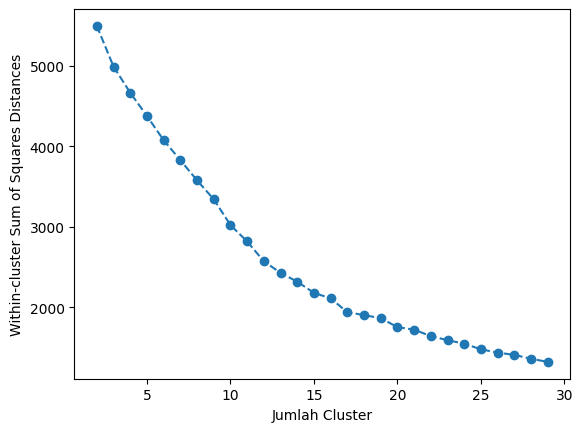

In [28]:
plt.plot(range(2,30),wcss,'o--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Within-cluster Sum of Squares Distances");

In [29]:
pd.Series(wcss)
# perlu diingat bahwa model dimulai dari kluster 2

0     5499.047128
1     4993.495020
2     4668.482765
3     4379.668062
4     4078.754388
5     3830.636133
6     3579.471484
7     3344.203124
8     3023.809785
9     2819.129127
10    2572.487576
11    2428.999049
12    2319.076079
13    2180.518161
14    2111.631584
15    1940.683653
16    1903.614123
17    1864.950300
18    1754.777682
19    1722.558724
20    1642.267440
21    1592.096605
22    1548.054975
23    1478.142435
24    1437.648293
25    1408.654684
26    1361.069443
27    1321.581417
dtype: float64

In [30]:
pd.Series(wcss).diff()

0            NaN
1    -505.552108
2    -325.012256
3    -288.814703
4    -300.913674
5    -248.118255
6    -251.164649
7    -235.268360
8    -320.393338
9    -204.680659
10   -246.641551
11   -143.488527
12   -109.922970
13   -138.557917
14    -68.886577
15   -170.947931
16    -37.069530
17    -38.663823
18   -110.172618
19    -32.218958
20    -80.291284
21    -50.170834
22    -44.041630
23    -69.912541
24    -40.494142
25    -28.993609
26    -47.585241
27    -39.488026
dtype: float64

<Axes: >

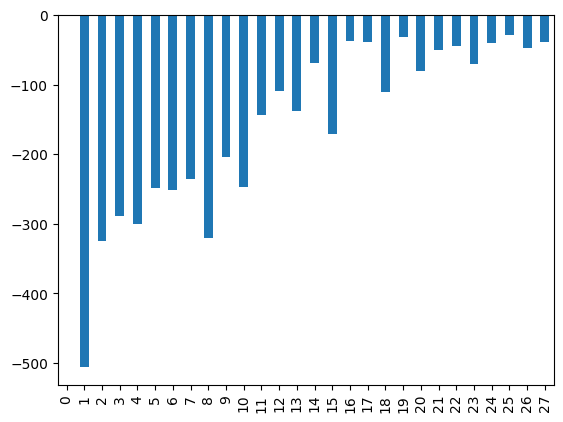

In [31]:
pd.Series(wcss).diff().plot(kind='bar')

Buat label cluster untuk nilai K yang dipilih. Berdasarkan solusi tersebut, kami yakin K=3 atau K=15 adalah pilihan yang masuk akal. Tetapi jangan ragu untuk memilih yang berbeda.

In [71]:
model = KMeans(n_clusters=15)
    
model.fit(scaled_X)

KMeans(n_clusters=15)

In [72]:
X['K=15 Clusters'] = model.labels_

In [73]:
X.corr()['K=15 Clusters'].sort_values()

Region_WESTERN EUROPE                        -0.464327
Deathrate                                    -0.377815
Region_SUB-SAHARAN AFRICA                    -0.340200
Net migration                                -0.325818
Infant mortality (per 1000 births)           -0.274831
Birthrate                                    -0.241923
Agriculture                                  -0.213115
Region_OCEANIA                               -0.195197
GDP ($ per capita)                           -0.173237
Population                                   -0.125988
Climate                                      -0.090190
Region_ASIA (EX. NEAR EAST)                  -0.066279
Pop. Density (per sq. mi.)                   -0.062902
Region_NEAR EAST                             -0.054358
Arable (%)                                   -0.020884
Crops (%)                                    -0.007334
Phones (per 1000)                             0.019378
Industry                                      0.022240
Other (%) 

In [70]:
model = KMeans(n_clusters=3)
    
model.fit(scaled_X)

KMeans(n_clusters=3)

In [53]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1])

In [54]:
X['K=3 Clusters'] = model.labels_

In [55]:
X.corr()['K=3 Clusters'].sort_values()

GDP ($ per capita)                           -0.557357
Region_WESTERN EUROPE                        -0.519659
Climate                                      -0.468213
Phones (per 1000)                            -0.450892
Deathrate                                    -0.354696
Net migration                                -0.345328
Region_EASTERN EUROPE                        -0.297113
Arable (%)                                   -0.296442
Service                                      -0.262937
Region_BALTICS                               -0.177698
Literacy (%)                                 -0.163426
Pop. Density (per sq. mi.)                   -0.147321
Region_SUB-SAHARAN AFRICA                    -0.125978
Region_NORTHERN AMERICA                      -0.085462
K=15 Clusters                                 0.004688
Industry                                      0.047885
Region_ASIA (EX. NEAR EAST)                   0.060406
Area (sq. mi.)                                0.063002
Population

**Membuat plot klaster menggunakan peta choropleth dengan tingkat negara.**

1. Install library plotly: https://plotly.com/python/getting-started/

2. Cari tahu cara membuat peta choropleth geografis menggunakan plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. Anda memerlukan Kode ISO untuk ini. Gunakan file yang kami sediakan untuk ini: **"country_iso_codes.csv"**

4. Gabungkan label kluster, Kode ISO, dan Nama Negara untuk membuat plot peta dunia dengan plot sesuai.


**Note: Ini dimaksudkan untuk menjadi proyek yang lebih realistis, di mana Anda memiliki tujuan yang jelas tentang apa yang perlu Anda buat dan capai.**

In [56]:
iso_codes = pd.read_csv("country_iso_codes.csv")

In [57]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [58]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [59]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [60]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,2
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,1
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,0


In [61]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'ISO Code', 'Cluster'],
      dtype='object')

In [62]:
model.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1])

In [74]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [75]:
df['Cluster'] = model.labels_

In [76]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,ISO Code,Cluster
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,AFG,3
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,ALB,8
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,...,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,DZA,10
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,...,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,ASM,4
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,...,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,AND,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,...,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630,NaN,6
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,...,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400,NaN,10
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,...,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393,YEM,6
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,...,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489,ZMB,3


In [77]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country",
                    color_continuous_scale='Turbo'
                    )
fig.show()